In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df_val = df.iloc[:10]
df_val

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
df.drop('customerID',1, inplace=True)

In [5]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [7]:
df.TotalCharges.isna()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [8]:
df[df.TotalCharges.isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [10]:
df.dropna(subset=['TotalCharges'], inplace=True)

In [11]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


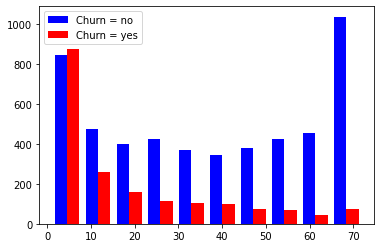

In [15]:
dfno = df[df.Churn=='No'].tenure
dfyes = df[df.Churn=='Yes'].tenure

plt.hist([dfno, dfyes], color=['blue', 'red'], label=['Churn = no', 'Churn = yes'])
plt.legend()

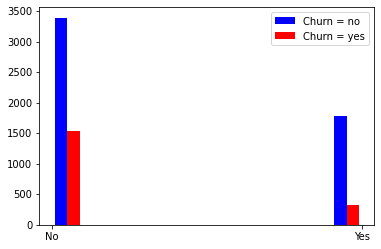

In [16]:
dfno = df[df.Churn=='No'].Dependents
dfyes = df[df.Churn=='Yes'].Dependents

plt.hist([dfno, dfyes], color=['blue', 'red'], label=['Churn = no', 'Churn = yes'])
plt.legend()

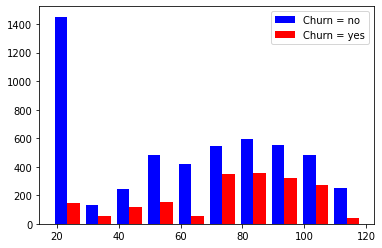

In [17]:
dfno = df[df.Churn=='No'].MonthlyCharges
dfyes = df[df.Churn=='Yes'].MonthlyCharges

plt.hist([dfno, dfyes], color=['blue', 'red'], label=['Churn = no', 'Churn = yes'])
plt.legend()

No: 5163 Yes: 1869  % No : 26.58


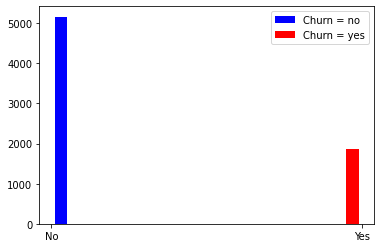

In [19]:
dfno = df[df.Churn=='No'].Churn
dfyes = df[df.Churn=='Yes'].Churn

total = dfno.count() + dfyes.count()
percent = round((dfyes.count() / total) * 100, 2)

print(f'No: {dfno.count()}', f'Yes: {dfyes.count()}', f' % No : {percent}')

plt.hist([dfno, dfyes], color=['blue', 'red'], label=['Churn = no', 'Churn = yes'])
plt.legend()

In [21]:
for i in df:
    if df[i].dtypes=='object':
        print(f'{i} : {df[i].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [22]:
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

In [23]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [24]:
dfnum = pd.get_dummies(data=df, columns=['gender','InternetService','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod'])
dfnum.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_

In [25]:
dfnum.sample(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1803,0,36,53.10,1901.25,No,1,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
937,0,6,79.05,434.50,Yes,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3478,0,23,78.55,1843.05,No,1,0,1,0,0,...,1,0,1,0,0,1,0,0,1,0
6476,0,53,64.15,3491.55,No,0,1,1,0,0,...,0,0,1,0,1,0,1,0,0,0
4282,0,52,101.25,5301.10,No,1,0,0,1,0,...,1,0,1,0,1,0,1,0,0,0


In [26]:
le = LabelEncoder()
dfnum['Churn'] = le.fit_transform(dfnum['Churn'])
dfnum.Churn.sample(15)

780     0
4819    1
3401    0
3812    0
1632    1
1708    1
6265    0
6514    0
4467    0
4530    0
3211    0
4606    0
3818    0
692     0
6738    0
Name: Churn, dtype: int64

In [27]:
scaler = MinMaxScaler()
dfnum[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(dfnum[['tenure', 'MonthlyCharges', 'TotalCharges']])
dfnum.sample(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2414,0,0.338028,0.019403,0.056439,0,1,0,0,0,1,...,0,0,1,0,0,1,1,0,0,0
3303,0,0.042254,0.594030,0.033089,1,1,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0
3632,0,0.323944,0.610945,0.220390,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
6168,0,0.000000,0.606965,0.006976,1,0,1,0,1,0,...,1,1,0,0,0,1,0,0,1,0
2690,1,0.098592,0.618905,0.065157,1,0,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0


In [28]:
features = dfnum.drop(['Churn'], 1)
label = dfnum['Churn']

In [30]:
val = features.head(10)
val

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Partner_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.000000,0.115423,0.001275,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,0,0.464789,0.385075,0.215867,0,1,1,0,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,0.014085,0.354229,0.010310,0,1,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,0.619718,0.239303,0.210241,0,1,1,0,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,0.014085,0.521891,0.015330,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
5,0,0.098592,0.809950,0.092511,1,0,0,1,0,1,...,1,1,0,0,0,1,0,0,1,0
6,0,0.295775,0.704975,0.222779,0,1,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
7,0,0.126761,0.114428,0.032668,1,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,1
8,0,0.380282,0.861194,0.349325,1,0,0,1,0,0,...,1,1,0,0,0,1,0,0,1,0
9,0,0.859155,0.377114,0.400317,0,1,1,0,0,1,...,0,0,1,0,1,0,1,0,0,0


In [32]:
features = features.iloc[10:]
label = label.iloc[10:]

In [34]:
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=20, random_state=42)

In [36]:
model = Sequential([
    Dense(20, input_shape=(41,), activation='relu'),
    Dense(52, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [37]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
219/219 [==============================] - 1s 1ms/step - loss: 0.5573 - accuracy: 0.7043
Epoch 2/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4298 - accuracy: 0.7955
Epoch 3/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4136 - accuracy: 0.8069
Epoch 4/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4189 - accuracy: 0.8067
Epoch 5/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4075 - accuracy: 0.8116
Epoch 6/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4247 - accuracy: 0.8013
Epoch 7/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4085 - accuracy: 0.8093
Epoch 8/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4006 - accuracy: 0.8147
Epoch 9/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4095 - accuracy: 0.8104
Epoch 10/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4164 - accura

219/219 [==============================] - 0s 1ms/step - loss: 0.3540 - accuracy: 0.8316
Epoch 82/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3613 - accuracy: 0.8292
Epoch 83/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3509 - accuracy: 0.8373
Epoch 84/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3532 - accuracy: 0.8342
Epoch 85/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3500 - accuracy: 0.8322
Epoch 86/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3588 - accuracy: 0.8350
Epoch 87/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3463 - accuracy: 0.8352
Epoch 88/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3489 - accuracy: 0.8385
Epoch 89/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3505 - accuracy: 0.8353
Epoch 90/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3425 - accuracy: 

In [38]:
pred_val = model.predict(val)
print(pred_val)

[[0.4886498 ]
 [0.01561677]
 [0.4698162 ]
 [0.01061279]
 [0.7479832 ]
 [0.9702516 ]
 [0.28525698]
 [0.05150113]
 [0.6155678 ]
 [0.02913597]]


In [40]:
y_pred = []
for i in pred_val:
    if i > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
        
cliente = df_val['customerID']
real = df_val['Churn']
pred = list(pred_val.flatten())

df = pd.DataFrame({'cliente':cliente, 'previsao': pred, 'real':real, 'churn':y_pred})

print(df)

      cliente  previsao real  churn
0  7590-VHVEG  0.488650   No      0
1  5575-GNVDE  0.015617   No      0
2  3668-QPYBK  0.469816  Yes      0
3  7795-CFOCW  0.010613   No      0
4  9237-HQITU  0.747983  Yes      1
5  9305-CDSKC  0.970252  Yes      1
6  1452-KIOVK  0.285257   No      0
7  6713-OKOMC  0.051501   No      0
8  7892-POOKP  0.615568  Yes      1
9  6388-TABGU  0.029136   No      0


<AxesSubplot:xlabel='chrun', ylabel='real'>

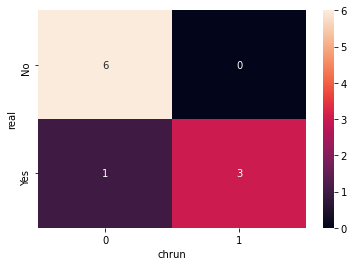

In [42]:
import seaborn as sns

df = pd.DataFrame(df, columns=['real','churn'])
confusion_matrix = pd.crosstab(df['real'], df['churn'], rownames=['real'], colnames=['chrun'])

sns.heatmap(confusion_matrix, annot=True)